### Import Libraries and Data Overview

In [1]:
import pandas as pd
import numpy as np

In [2]:
transaction_data = pd.read_csv("/Users/ethanael/Documents/Taiwan/Data Mining/Data Mining Project/Datasets/acct_transaction.csv")
alert_data = pd.read_csv("/Users/ethanael/Documents/Taiwan/Data Mining/Data Mining Project/Datasets/acct_alert.csv")
predict_data = pd.read_csv("/Users/ethanael/Documents/Taiwan/Data Mining/Data Mining Project/Datasets/acct_predict.csv")

                            

In [3]:
transaction_data.head()

,from_acct,from_acct_type,to_acct,to_acct_type,is_self_txn,txn_amt,txn_date,txn_time,currency_type,channel_type
0,be6fdd2d0f9aa02b0b09436fb137654942e3346e16ab43...,1,7abb16ac9bddc1f464981131ba68506775a964df2e0734...,1,N,47500.0,71,05:05:00,TWD,04
1,18f3d0e79217f8bc8b4cb485f9f80a884771b846de652f...,1,e77e425fb5f3ece7a7b431b3c43cc1d040f3054e35479d...,2,UNK,6150.0,31,20:55:00,TWD,03
2,302f3911cbf56bf9b5ad209a4b045a82380f98d92604c1...,1,4a707a0af2aa824777082803013610090033104c308023...,1,N,1150000.0,37,09:20:00,TWD,04
3,5a4809796865b1526f46e5dda6a35c1a4def3cbe969cc8...,1,d16b1bf33802f020b508002755c13aad549bc59dde7aae...,2,UNK,8550.0,106,13:40:00,TWD,04
4,7f84214987bdee16ffbaf3d70824e6385ce80e032a24c5...,1,c2e0f75b54f394b29755779ab9a488931e9d893a0e5f8f...,1,N,1450.0,84,11:20:00,TWD,03


In [4]:
alert_data.head()

,acct,event_date
0,80bd1c28b47357a3d37a01835ebb1bed5edf54e791bd3d...,87
1,b8c11db05d00b5ac66be10ffee5f6ce6ef9221c733a4bb...,19
2,daa05c68b290ac3cc522abad400c5304dffba07baa232c...,81
3,174e26ecc9cee56aaaca855c743a106275c58629740a49...,88
4,007cf5c98aa4f9f3e444c9cdaca74d0f7542e9a2804201...,117


In [5]:
predict_data.head()

,acct,label
0,fcf31c5113d3dbd9cb5056045c6a0f213bd8a4fc1bc834...,0
1,e21dfa45e990364194468e501fbfe52ec02a4b71a2e2e8...,0
2,2552e943aaf9caa33183758cd40128ef20a6e6ff16c232...,0
3,71700e7b7c3d40abdfdbcc7afc0752fa8d9bd28b408651...,0
4,c70349fc718ffb88f03f31b5a7fcf65b33dd71dce6fee0...,0


### Data Exploration

#### Check for Missing Values

In [7]:
transaction_data.isnull()

,from_acct,from_acct_type,to_acct,to_acct_type,is_self_txn,txn_amt,txn_date,txn_time,currency_type,channel_type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4435885,False,False,False,False,False,False,False,False,False,False
4435886,False,False,False,False,False,False,False,False,False,False
4435887,False,False,False,False,False,False,False,False,False,False
4435888,False,False,False,False,False,False,False,False,False,False


In [9]:
transaction_data.isnull().any().any()

False

No missing value is detected, we can move on.

#### Check for Duplicate Data

In [10]:
sum(transaction_data.duplicated())

72355

In [16]:
# Check an example of duplicate data
first_duplicate = transaction_data[transaction_data.duplicated()].iloc[0]

# Find all rows that match this duplicate
matching_rows = transaction_data[(transaction_data == first_duplicate).all(axis=1)]

In [17]:
first_duplicate

from_acct         a2d95b4315ace4cbf9d545c964617a767fd6ec08b09ed6...
from_acct_type                                                    1
to_acct           ecccfd52077ceac00b1b6ffd4213f106125cffdbbc8a7f...
to_acct_type                                                      1
is_self_txn                                                       Y
txn_amt                                                     46500.0
txn_date                                                         68
txn_time                                                   15:25:00
currency_type                                                   JPY
channel_type                                                    UNK
Name: 18172, dtype: object

In [18]:
matching_rows

,from_acct,from_acct_type,to_acct,to_acct_type,is_self_txn,txn_amt,txn_date,txn_time,currency_type,channel_type
17699,a2d95b4315ace4cbf9d545c964617a767fd6ec08b09ed6...,1,ecccfd52077ceac00b1b6ffd4213f106125cffdbbc8a7f...,1,Y,46500.0,68,15:25:00,JPY,UNK
18172,a2d95b4315ace4cbf9d545c964617a767fd6ec08b09ed6...,1,ecccfd52077ceac00b1b6ffd4213f106125cffdbbc8a7f...,1,Y,46500.0,68,15:25:00,JPY,UNK


It seems like the data is very dirty. There are lots of transactions that are duplicated more than once. Let's drop the duplicates.

In [24]:
transaction_data = transaction_data.drop_duplicates()

In [25]:
sum(transaction_data.duplicated())

0

### Exploratory Data Analysis on Transaction Data

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", font_scale=1.2)  # cleaner and larger style

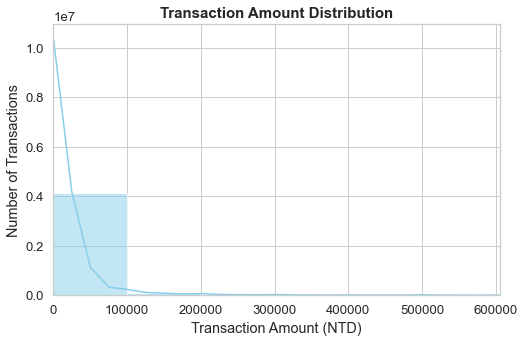

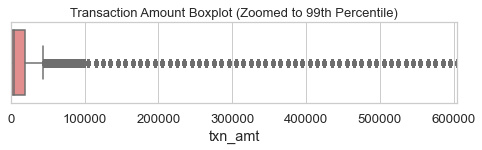

Outliers detected: 496,751


In [44]:
plt.figure(figsize=(8,5))
sns.histplot(transaction_data['txn_amt'], bins=50, kde=True, color='skyblue')
plt.title("Transaction Amount Distribution", fontsize=15, weight='bold')
plt.xlabel("Transaction Amount (NTD)")
plt.ylabel("Number of Transactions")
plt.xlim(0, np.percentile(transaction_data['txn_amt'], 99))  # zoom in to 99th percentile
plt.show()

# Boxplot for outlier visualization
plt.figure(figsize=(8,1.5))
sns.boxplot(x=transaction_data['txn_amt'], color='lightcoral')
plt.title("Transaction Amount Boxplot (Zoomed to 99th Percentile)", fontsize=13)
plt.xlim(0, np.percentile(transaction_data['txn_amt'], 99))
plt.show()

# Outlier count summary
q1 = transaction_data['txn_amt'].quantile(0.25)
q3 = transaction_data['txn_amt'].quantile(0.75)
iqr = q3 - q1
outlier_cutoff = q3 + 1.5 * iqr
outlier_count = (transaction_data['txn_amt'] > outlier_cutoff).sum()
print(f"Outliers detected: {outlier_count:,}")

We can see that most transcation has <100000 NTD amount. 

There are lots of outliers in the data. Feature Scaling might be used.

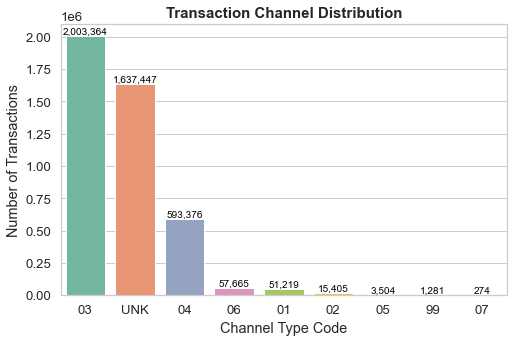

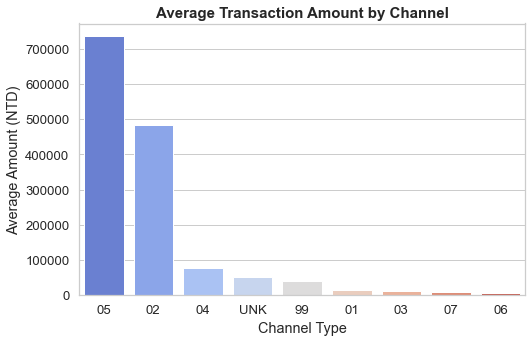

In [45]:
plt.figure(figsize=(8,5))
order = transaction_data['channel_type'].value_counts().index
ax = sns.countplot(x='channel_type', data=transaction_data, order=order, palette='Set2')
plt.title("Transaction Channel Distribution", fontsize=15, weight='bold')
plt.xlabel("Channel Type Code")
plt.ylabel("Number of Transactions")

# add counts on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', rotation=0)
plt.show()

# Average transaction per channel
avg_txn = transaction_data.groupby('channel_type')['txn_amt'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=avg_txn.index, y=avg_txn.values, palette='coolwarm')
plt.title("Average Transaction Amount by Channel", fontsize=15, weight='bold')
plt.xlabel("Channel Type")
plt.ylabel("Average Amount (NTD)")
plt.show()

The transcation channel that is mostly used is 03 (Bank transfer), unknown, and 04 (Online Banking)

05 (IVR) and 02 (Counter) are used for larger transactions

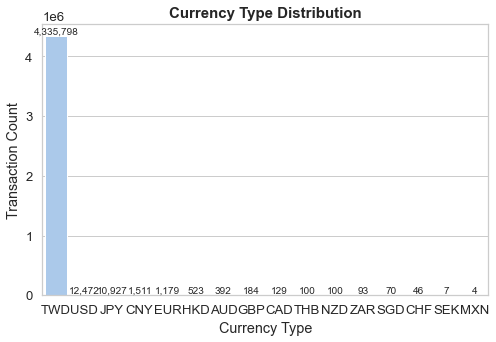

In [46]:
plt.figure(figsize=(8,5))
order = transaction_data['currency_type'].value_counts().index
ax = sns.countplot(x='currency_type', data=transaction_data, order=order, palette='pastel')
plt.title("Currency Type Distribution", fontsize=15, weight='bold')
plt.xlabel("Currency Type")
plt.ylabel("Transaction Count")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)
plt.show()

Almost all transactions are done using NTD.

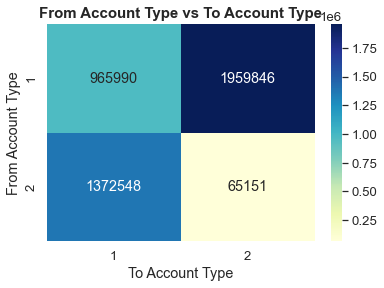

In [47]:
cross_tab = pd.crosstab(transaction_data['from_acct_type'], transaction_data['to_acct_type'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title("From Account Type vs To Account Type", fontsize=15, weight='bold')
plt.xlabel("To Account Type")
plt.ylabel("From Account Type")
plt.show()

Mostly, transactions happened from 1 (E.SUN) to 2 (Other bank)

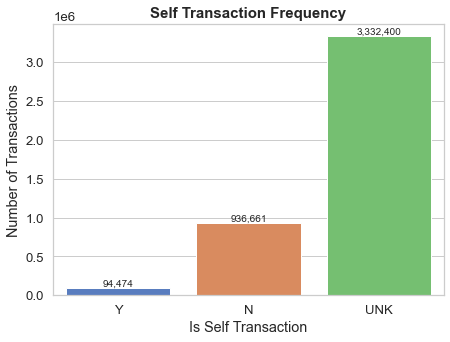

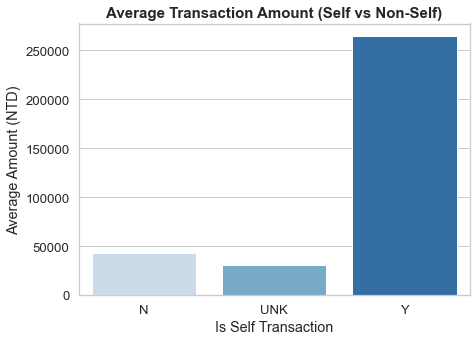

In [48]:
plt.figure(figsize=(7,5))
order = ['Y', 'N', 'UNK']
ax = sns.countplot(x='is_self_txn', data=transaction_data, order=order, palette='muted')
plt.title("Self Transaction Frequency", fontsize=15, weight='bold')
plt.xlabel("Is Self Transaction")
plt.ylabel("Number of Transactions")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)
plt.show()

avg_self = transaction_data.groupby('is_self_txn')['txn_amt'].mean()
plt.figure(figsize=(7,5))
sns.barplot(x=avg_self.index, y=avg_self.values, palette='Blues')
plt.title("Average Transaction Amount (Self vs Non-Self)", fontsize=15, weight='bold')
plt.xlabel("Is Self Transaction")
plt.ylabel("Average Amount (NTD)")
plt.show()

Mostly, it is undetectable whether it is self transaction or not. However, in the detectables, mostly are not self transaction.

For the transaction amount, self transactions have significantly larger amount.

/var/folders/b8/mvd11sjs16qgkl75_18vdqm40000gn/T/ipykernel_95149/1734023374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data['txn_date'] = pd.to_numeric(transaction_data['txn_date'], errors='coerce')
/var/folders/b8/mvd11sjs16qgkl75_18vdqm40000gn/T/ipykernel_95149/1734023374.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data['txn_time'] = transaction_data['txn_time'].astype(str)
/var/folders/b8/mvd11sjs16qgkl75_18vdqm40000gn/T/ipykernel_95149/1734023374.py:6: SettingWit

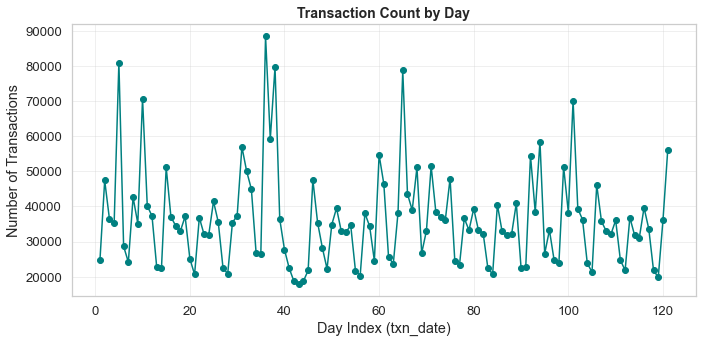

In [53]:
# Ensure txn_date is integer and txn_time is string
transaction_data['txn_date'] = pd.to_numeric(transaction_data['txn_date'], errors='coerce')
transaction_data['txn_time'] = transaction_data['txn_time'].astype(str)

# Extract hour from txn_time (HH:MM:SS)
transaction_data['hour'] = pd.to_datetime(transaction_data['txn_time'], format='%H:%M:%S', errors='coerce').dt.hour

# =========================================================
date_counts = transaction_data['txn_date'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(date_counts.index, date_counts.values, marker='o', linestyle='-', color='teal')
plt.title("Transaction Count by Day", fontsize=14, weight='bold')
plt.xlabel("Day Index (txn_date)")
plt.ylabel("Number of Transactions")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Here we can see what date do transactions mostly happened. There are some spikes in the graph: day 4, 36, 65, 101

🕒 Average transaction time: around 13.4:00 hours


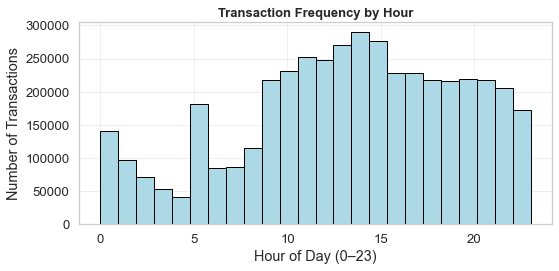

In [52]:
avg_hour = transaction_data['hour'].mean()
print(f"🕒 Average transaction time: around {avg_hour:.1f}:00 hours")

# Optional: Hourly distribution
plt.figure(figsize=(8,4))
transaction_data['hour'].plot(kind='hist', bins=24, color='lightblue', edgecolor='black')
plt.title("Transaction Frequency by Hour", fontsize=13, weight='bold')
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Transactions")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Here, we can see that most oftenly, people do transactions during afternoon until the evening.

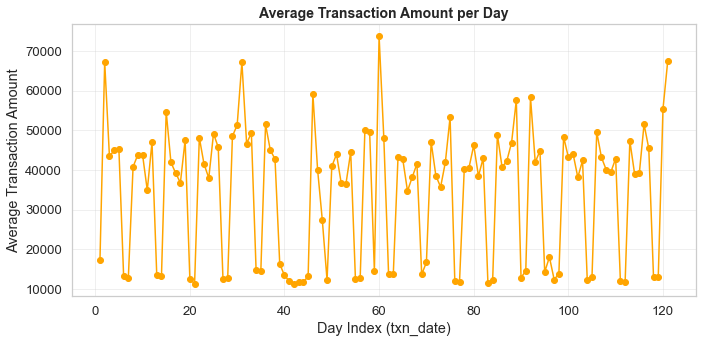

In [54]:
avg_amt_day = transaction_data.groupby('txn_date')['txn_amt'].mean()

plt.figure(figsize=(10,5))
plt.plot(avg_amt_day.index, avg_amt_day.values, marker='o', linestyle='-', color='orange')
plt.title("Average Transaction Amount per Day", fontsize=14, weight='bold')
plt.xlabel("Day Index (txn_date)")
plt.ylabel("Average Transaction Amount")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Large transcation happened once in a while.

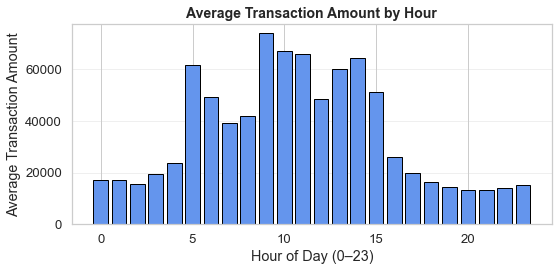

In [55]:
avg_amt_hour = transaction_data.groupby('hour')['txn_amt'].mean().sort_index()

plt.figure(figsize=(8,4))
plt.bar(avg_amt_hour.index, avg_amt_hour.values, color='cornflowerblue', edgecolor='black')
plt.title("Average Transaction Amount by Hour", fontsize=14, weight='bold')
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Average Transaction Amount")
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

The largest transaction happens to be in the morning (9, 10, 11)

### Aggregating Transaction Data into Account Level

#### Time Features

In [60]:
df = transaction_data.copy()

# Prepare time features
df['hour'] = pd.to_datetime(df['txn_time'], format='%H:%M:%S', errors='coerce').dt.hour

def hour_group(h):
    if 0 <= h <= 3: return 'time_04'
    elif 4 <= h <= 8: return 'time_59'
    elif 9 <= h <= 14: return 'time_1014'
    elif 15 <= h <= 19: return 'time_1519'
    elif 20 <= h <= 23: return 'time_2023'
    else: return 'time_unk'
df['time_group'] = df['hour'].apply(hour_group)

#### FROM (senders) aggregation

In [62]:
# Aggregate for FROM accounts (senders)
agg_from = df.groupby('from_acct').agg({
    'from_acct_type': 'first',
    'txn_amt': ['sum', 'mean', 'std'],
    'txn_date': 'nunique',
    'currency_type': [
        lambda x: (x == 'NTD').sum(),
        lambda x: (~x.isin(['NTD'])).sum()
    ],
    'is_self_txn': [
        lambda x: (x == 'Y').sum(),
        lambda x: (x == 'N').sum(),
        lambda x: (~x.isin(['Y','N'])).sum()
    ],
    'channel_type': [
        lambda x: (x == '1').sum(),
        lambda x: (x == '2').sum(),
        lambda x: (x == '3').sum(),
        lambda x: (x == '4').sum(),
        lambda x: (x == '5').sum(),
        lambda x: (x == '6').sum(),
        lambda x: (x == '7').sum(),
        lambda x: (x == '99').sum(),
        lambda x: (~x.isin(['1','2','3','4','5','6','7','99'])).sum()
    ],
    'time_group': [
        lambda x: (x == 'time_04').sum(),
        lambda x: (x == 'time_59').sum(),
        lambda x: (x == 'time_1014').sum(),
        lambda x: (x == 'time_1519').sum(),
        lambda x: (x == 'time_2023').sum()
    ]
})

# Rename columns for sender perspective
agg_from.columns = [
    'from_acct_type',
    'txn_amt_from_total', 'avg_txn_amt_from', 'std_txn_amt_from',
    'active_days_from',
    'currency_ntd_from', 'currency_others_from',
    'is_self_txn_y_from', 'is_self_txn_n_from', 'is_self_txn_unk_from',
    'channel_type_1_from', 'channel_type_2_from', 'channel_type_3_from',
    'channel_type_4_from', 'channel_type_5_from', 'channel_type_6_from',
    'channel_type_7_from', 'channel_type_99_from', 'channel_type_unk_from',
    'txn_count_time_04_from', 'txn_count_time_59_from',
    'txn_count_time_1014_from', 'txn_count_time_1519_from', 'txn_count_time_2023_from'
]
agg_from.reset_index(inplace=True)
agg_from.rename(columns={'from_acct': 'acct'}, inplace=True)

In [64]:
agg_from.head()

,acct,from_acct_type,txn_amt_from_total,avg_txn_amt_from,std_txn_amt_from,active_days_from,currency_ntd_from,currency_others_from,is_self_txn_y_from,is_self_txn_n_from,...,channel_type_5_from,channel_type_6_from,channel_type_7_from,channel_type_99_from,channel_type_unk_from,txn_count_time_04_from,txn_count_time_59_from,txn_count_time_1014_from,txn_count_time_1519_from,txn_count_time_2023_from
0,00000eec52ea49377de91bc7b54eb3192943e6c20e0a51...,2,205.0,205.0,NaN,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,000015150c92e2a41c4715a088df78d77a7d4f3017aadc...,2,585.0,585.0,NaN,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0000319cf868e5a245bbe4726c9f8f0cbb7cbc03a9aa01...,2,20500.0,20500.0,NaN,1,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
3,000047d4d4551618c647b5bc602ecaeb7f42bbdece0750...,2,5050.0,5050.0,NaN,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,00007e8eec41727b71aca0e00cf26c75bd96babafa5203...,1,31500.0,4500.0,4166.033285,6,0,7,0,3,...,0,0,0,0,7,0,0,2,4,1


#### TO (Receiver) Aggregation

In [66]:
agg_to = df.groupby('to_acct').agg({
    'to_acct_type': 'first',
    'txn_amt': ['sum', 'mean', 'std'],
    'txn_date': 'nunique',
    'currency_type': [
        lambda x: (x == 'NTD').sum(),
        lambda x: (~x.isin(['NTD'])).sum()
    ],
    'is_self_txn': [
        lambda x: (x == 'Y').sum(),
        lambda x: (x == 'N').sum(),
        lambda x: (~x.isin(['Y','N'])).sum()
    ],
    'channel_type': [
        lambda x: (x == '1').sum(),
        lambda x: (x == '2').sum(),
        lambda x: (x == '3').sum(),
        lambda x: (x == '4').sum(),
        lambda x: (x == '5').sum(),
        lambda x: (x == '6').sum(),
        lambda x: (x == '7').sum(),
        lambda x: (x == '99').sum(),
        lambda x: (~x.isin(['1','2','3','4','5','6','7','99'])).sum()
    ],
    'time_group': [
        lambda x: (x == 'time_04').sum(),
        lambda x: (x == 'time_59').sum(),
        lambda x: (x == 'time_1014').sum(),
        lambda x: (x == 'time_1519').sum(),
        lambda x: (x == 'time_2023').sum()
    ]
})

# Rename columns for receiver perspective
agg_to.columns = [
    'to_acct_type',
    'txn_amt_to_total', 'avg_txn_amt_to', 'std_txn_amt_to',
    'active_days_to',
    'currency_ntd_to', 'currency_others_to',
    'is_self_txn_y_to', 'is_self_txn_n_to', 'is_self_txn_unk_to',
    'channel_type_1_to', 'channel_type_2_to', 'channel_type_3_to',
    'channel_type_4_to', 'channel_type_5_to', 'channel_type_6_to',
    'channel_type_7_to', 'channel_type_99_to', 'channel_type_unk_to',
    'txn_count_time_04_to', 'txn_count_time_59_to',
    'txn_count_time_1014_to', 'txn_count_time_1519_to', 'txn_count_time_2023_to'
]
agg_to.reset_index(inplace=True)
agg_to.rename(columns={'to_acct': 'acct'}, inplace=True)

In [67]:
agg_to.head()

,acct,to_acct_type,txn_amt_to_total,avg_txn_amt_to,std_txn_amt_to,active_days_to,currency_ntd_to,currency_others_to,is_self_txn_y_to,is_self_txn_n_to,...,channel_type_5_to,channel_type_6_to,channel_type_7_to,channel_type_99_to,channel_type_unk_to,txn_count_time_04_to,txn_count_time_59_to,txn_count_time_1014_to,txn_count_time_1519_to,txn_count_time_2023_to
0,00000577cfcd0bde8ee693021419ef13a1f7f933ec8626...,2,4050.0,4050.0,NaN,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,00002846e6b430580825e2b10fe3ff1e3ddb93f42c608d...,2,3050.0,3050.0,NaN,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,00002b3d8f9c7b91c407a5725849deb521fcf1dd5eea1f...,2,75.0,75.0,NaN,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0000319cf868e5a245bbe4726c9f8f0cbb7cbc03a9aa01...,2,68000.0,34000.0,23334.523779,2,0,2,0,0,...,0,0,0,0,2,0,0,1,0,1
4,00003f3fb30775e809a2e02924f57f360f3d02e89cbd82...,2,3050.0,3050.0,NaN,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [68]:
agg_df = pd.merge(agg_from, agg_to, on='acct', how='outer')

### Data Overview of the merged data

In [70]:
agg_df.head()

,acct,from_acct_type,txn_amt_from_total,avg_txn_amt_from,std_txn_amt_from,active_days_from,currency_ntd_from,currency_others_from,is_self_txn_y_from,is_self_txn_n_from,...,channel_type_5_to,channel_type_6_to,channel_type_7_to,channel_type_99_to,channel_type_unk_to,txn_count_time_04_to,txn_count_time_59_to,txn_count_time_1014_to,txn_count_time_1519_to,txn_count_time_2023_to
0,00000eec52ea49377de91bc7b54eb3192943e6c20e0a51...,2.0,205.0,205.0,NaN,1.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000015150c92e2a41c4715a088df78d77a7d4f3017aadc...,2.0,585.0,585.0,NaN,1.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000319cf868e5a245bbe4726c9f8f0cbb7cbc03a9aa01...,2.0,20500.0,20500.0,NaN,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0
3,000047d4d4551618c647b5bc602ecaeb7f42bbdece0750...,2.0,5050.0,5050.0,NaN,1.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00007e8eec41727b71aca0e00cf26c75bd96babafa5203...,1.0,31500.0,4500.0,4166.033285,6.0,0.0,7.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800106 entries, 0 to 1800105
Data columns (total 49 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   acct                      object 
 1   from_acct_type            float64
 2   txn_amt_from_total        float64
 3   avg_txn_amt_from          float64
 4   std_txn_amt_from          float64
 5   active_days_from          float64
 6   currency_ntd_from         float64
 7   currency_others_from      float64
 8   is_self_txn_y_from        float64
 9   is_self_txn_n_from        float64
 10  is_self_txn_unk_from      float64
 11  channel_type_1_from       float64
 12  channel_type_2_from       float64
 13  channel_type_3_from       float64
 14  channel_type_4_from       float64
 15  channel_type_5_from       float64
 16  channel_type_6_from       float64
 17  channel_type_7_from       float64
 18  channel_type_99_from      float64
 19  channel_type_unk_from     float64
 20  txn_count_time_04_from  

### Data Exploration of Merged Data

#### Check fo Missing Values

In [73]:
agg_df.isnull()

,acct,from_acct_type,txn_amt_from_total,avg_txn_amt_from,std_txn_amt_from,active_days_from,currency_ntd_from,currency_others_from,is_self_txn_y_from,is_self_txn_n_from,...,channel_type_5_to,channel_type_6_to,channel_type_7_to,channel_type_99_to,channel_type_unk_to,txn_count_time_04_to,txn_count_time_59_to,txn_count_time_1014_to,txn_count_time_1519_to,txn_count_time_2023_to
0,False,False,False,False,True,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,True,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800101,False,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1800102,False,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1800103,False,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1800104,False,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


We can see that there are columns with missing values as some accounty only send or only receive. To tackle this, we fill  the missing value with 0.

In [74]:
agg_df = agg_df.fillna(0)

agg_df.head()

,acct,from_acct_type,txn_amt_from_total,avg_txn_amt_from,std_txn_amt_from,active_days_from,currency_ntd_from,currency_others_from,is_self_txn_y_from,is_self_txn_n_from,...,channel_type_5_to,channel_type_6_to,channel_type_7_to,channel_type_99_to,channel_type_unk_to,txn_count_time_04_to,txn_count_time_59_to,txn_count_time_1014_to,txn_count_time_1519_to,txn_count_time_2023_to
0,00000eec52ea49377de91bc7b54eb3192943e6c20e0a51...,2.0,205.0,205.0,0.000000,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,000015150c92e2a41c4715a088df78d77a7d4f3017aadc...,2.0,585.0,585.0,0.000000,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0000319cf868e5a245bbe4726c9f8f0cbb7cbc03a9aa01...,2.0,20500.0,20500.0,0.000000,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0
3,000047d4d4551618c647b5bc602ecaeb7f42bbdece0750...,2.0,5050.0,5050.0,0.000000,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00007e8eec41727b71aca0e00cf26c75bd96babafa5203...,1.0,31500.0,4500.0,4166.033285,6.0,0.0,7.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
agg_df.isnull().any().any()

False

No more missing values, we can move on.

#### Check for Duplicated Data

In [76]:
sum(agg_df.duplicated())

0

No duplicates were found, good to go.

### Merging the Aggregated Transaction Data and the Alert Data

In [78]:
alert_data_merging = alert_data[['acct']].drop_duplicates()

In [79]:
alert_data_merging['alert flag'] = 1

In [80]:
alert_data_merging

,acct,alert flag
0,80bd1c28b47357a3d37a01835ebb1bed5edf54e791bd3d...,1
1,b8c11db05d00b5ac66be10ffee5f6ce6ef9221c733a4bb...,1
2,daa05c68b290ac3cc522abad400c5304dffba07baa232c...,1
3,174e26ecc9cee56aaaca855c743a106275c58629740a49...,1
4,007cf5c98aa4f9f3e444c9cdaca74d0f7542e9a2804201...,1
...,...,...
999,0dc3b10899fbf31411e3a32f2720ab7e8f9623423d2265...,1
1000,ac5a41e0717ce2f54d7246e708b877dc4eb19200ee61e0...,1
1001,640028cfabeb311532334fe930a1ccb82a476115854ff3...,1
1002,a968f594605939475eb3683a69e2f996842d15a4b36263...,1


In [86]:
merged_df['alert flag'] = merged_df['alert flag'].fillna(0).astype(int)

In [87]:
merged_df.head()

,acct,from_acct_type,txn_amt_from_total,avg_txn_amt_from,std_txn_amt_from,active_days_from,currency_ntd_from,currency_others_from,is_self_txn_y_from,is_self_txn_n_from,...,channel_type_6_to,channel_type_7_to,channel_type_99_to,channel_type_unk_to,txn_count_time_04_to,txn_count_time_59_to,txn_count_time_1014_to,txn_count_time_1519_to,txn_count_time_2023_to,alert flag
0,00000eec52ea49377de91bc7b54eb3192943e6c20e0a51...,2.0,205.0,205.0,0.000000,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,000015150c92e2a41c4715a088df78d77a7d4f3017aadc...,2.0,585.0,585.0,0.000000,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0000319cf868e5a245bbe4726c9f8f0cbb7cbc03a9aa01...,2.0,20500.0,20500.0,0.000000,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0
3,000047d4d4551618c647b5bc602ecaeb7f42bbdece0750...,2.0,5050.0,5050.0,0.000000,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,00007e8eec41727b71aca0e00cf26c75bd96babafa5203...,1.0,31500.0,4500.0,4166.033285,6.0,0.0,7.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [90]:
merged_df[merged_df["alert flag"] == 1] 

,acct,from_acct_type,txn_amt_from_total,avg_txn_amt_from,std_txn_amt_from,active_days_from,currency_ntd_from,currency_others_from,is_self_txn_y_from,is_self_txn_n_from,...,channel_type_6_to,channel_type_7_to,channel_type_99_to,channel_type_unk_to,txn_count_time_04_to,txn_count_time_59_to,txn_count_time_1014_to,txn_count_time_1519_to,txn_count_time_2023_to,alert flag
234,00112527a4499a768559488e8e2ce5547523eb3851e293...,1.0,517500.0,64687.500000,35051.938504,5.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,2.0,2.0,0.0,1
424,001fb9eac39927f82eb048b62a80f9a14743441b05c836...,1.0,27500.0,4583.333333,1722.401424,5.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,10.0,1.0,0.0,4.0,0.0,5.0,1
1587,007cf5c98aa4f9f3e444c9cdaca74d0f7542e9a2804201...,1.0,34700.0,6940.000000,8234.713110,5.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,8.0,0.0,2.0,3.0,2.0,1.0,1
4610,016dea291ff5e245739e6bde1257d7e30c677568005020...,1.0,63060.0,3318.947368,5791.488865,11.0,0.0,19.0,0.0,1.0,...,0.0,0.0,0.0,12.0,0.0,1.0,5.0,5.0,1.0,1
4959,018c38db15a2e4af51e5f17e01357ca4f84c37f41d8331...,1.0,23295.0,3882.500000,5182.365049,3.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776222,f9b8d7b8d4215a363285f061c17c2139e3fcc86a92f26c...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,0.0,2.0,6.0,0.0,3.0,1
1776236,f9b9c7d98756b18d7cf5642603d70d1ec165b9aeb70e81...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,1.0,1
1783154,fb8c7c57bd7c61ac7ffed8f50c76b8080c6a1d92ffcdd9...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,0.0,0.0,4.0,4.0,0.0,1
1783354,fb9ac045b0051f8895840079aeaa6a39564d6f95c4583c...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,1


#### Save the aggregated file

In [96]:
merged_df.to_csv('/Users/ethanael/Documents/Taiwan/Data Mining/Data Mining Project/Aggregated_transactions.csv', index=False)
